In [ ]:
!pip install ultralytics
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FH9GrrTUIrnVuHJnXAX0")
project = rf.workspace("prawns").project("-prawn-morphotypes")
dataset = project.version(4).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to 'prawn-morphotypes'-4 in yolov5pytorch:: 100%|██████████| 536/536 [00:00<00:00, 6674.37it/s]


In [ ]:
import wandb
run = wandb.init()
artifact = run.use_artifact('prawns/measurement paper/yolov8-only_31.12_-segment_segment.pt:v31', type='model')
artifact_dir = artifact.download()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: Downloading large artifact yolov8-only_31.12_-segment_segment.pt:v31, 263.64MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:18.0


In [ ]:
from YOLOtowandb import WandbCallback

from pathlib import Path
import wandb
import re

from ultralytics import YOLO

# Load a COCO-pretrained RT-DETR-l model
import wandb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib
import YOLOtowandb

importlib.reload(YOLOtowandb)

<module 'yolov8l16' from '/content/yolov8l16.py'>

In [ ]:
model = YOLO("yolov8l-pose.pt")  # load a pretrained model (recommended for training)


100%|██████████| 137M/137M [00:00<00:00, 322MB/s]


In [ ]:

wandb_logger = WandbCallback(
        model,project='measurement paper',run_name='yolov8-right_keypoint',tags=['keypoint','yolov8l-pose.pt']
    )

for event, callback_fn in wandb_logger.callbacks.items():
    model.add_callback(event, callback_fn)

## train notice yaml addresses ##

In [ ]:
model.train(data="/content/drive/MyDrive/colab experiments/to colab only 31-12 segment with 76/data.yaml", epochs=300, imgsz=640, seed=42,batch=8,patience=50)


In [ ]:
model = YOLO("/content/runs/segment/train/weights/best.pt")  # load a custom trained model

# Export the model
model.export(format="onnx")

Ultralytics YOLOv8.2.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

PyTorch: starting from '/content/runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (137.3 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 15.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 30.8s, saved as '/content/runs/segment/train/weights/best.onnx' (273.8 MB)

Export complete (48.8s)
Results saved to /content/runs/segment/train/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train/weights/best.onnx

'/content/runs/segment/train/weights/best.onnx'

In [4]:
import os
from PIL import Image
from tqdm import tqdm
# Input folders and corresponding output folders
# folders = {
#     'car': r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\car",
#     'left':r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\left",
#     'right': r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right"
# }

folders={'molt':r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted"}

# Create corresponding resized folders
output_folders = {key: f"{value}_resized" for key, value in folders.items()}

# Create output directories if they don't exist
for folder in output_folders.values():
    os.makedirs(folder, exist_ok=True)

# Resize all images in each folder and save them to the corresponding resized folder
def resize_images(input_folder, output_folder, size=(640, 640)):
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Filter for image files
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)
            img_resized = img.resize(size)
            output_path = os.path.join(output_folder, filename)
            img_resized.save(output_path)
            print(f"Saved resized image to {output_path}")

# Perform the resizing for each folder
for folder_name, folder_path in tqdm(folders.items()):
    resize_images(folder_path, output_folders[folder_name])


  0%|          | 0/1 [00:00<?, ?it/s]

Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h46m36s160.png
Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h46m54s892.png
Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h47m01s074.png
Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h47m15s479.png
Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h49m34s599.png


100%|██████████| 1/1 [00:03<00:00,  3.92s/it]

Saved resized image to C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted_resized\undistorted_vlcsnap-2024-09-19-21h49m47s447.png


In [49]:
from ultralytics import YOLO    


#model predict
model = YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\640360\car-better.pt")  

#predict
model.predict(source=r"C:\Users\gbo10\OneDrive\measurement_paper_images\test version  80\test-car\images" ,save_conf=True,save=True,save_txt=True,show_boxes=True,conf=0.25)


image 1/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure\undistorted_GX010192_10_696.jpg: 384x640 2 prawn-models, 838.2ms
image 2/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure\undistorted_GX010192_11_745.jpg: 384x640 2 prawn-models, 673.7ms
image 3/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure\undistorted_GX010192_16_1005.jpg: 384x640 1 prawn-model, 721.4ms
image 4/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure\undistorted_GX010192_17_1035.jpg: 384x640 1 prawn-model, 693.2ms
image 5/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\azure\undistorted_GX010192_18_1065.jpg: 384x640 2 prawn-models, 626.8ms
image 6/93 C:\Users\gbo10\OneDrive\measurement_paper_images\molt\all molt\undistorted\first_process\square\a

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'prawn-model'}
 obb: None
 orig_img: array([[[212, 156,  31],
         [212, 156,  31],
         [212, 156,  31],
         ...,
         [212, 156,  31],
         [212, 156,  31],
         [212, 156,  31]],
 
        [[212, 156,  31],
         [212, 156,  31],
         [212, 156,  31],
         ...,
         [212, 156,  31],
         [212, 156,  31],
         [212, 156,  31]],
 
        [[212, 156,  31],
         [212, 156,  31],
         [212, 156,  31],
         ...,
         [212, 156,  31],
         [212, 156,  31],
         [212, 156,  31]],
 
        ...,
 
        [[212, 156,  31],
         [212, 156,  31],
         [212, 156,  31],
         ...,
         [ 52,  65,  79],
         [ 52,  65,  79],
         [ 52,  65,  79]],
 
        [[212, 156,  31],
         [212, 156,  31],
         [212,

In [2]:
resize_images(r"C:\Users\gbo10\OneDrive\measurement_paper_images\molt\molt-19-9\unditorted")

NameError: name 'resize_images' is not defined

In [7]:
from ultralytics import YOLO

model = YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\640360\car-better.pt") 

model.val(data=r"C:\Users\gbo10\OneDrive\measurement_paper_images\test version  80\test-left\data - Copy (3).yaml")

Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8l-pose summary (fused): 287 layers, 44,456,805 parameters, 0 gradients, 168.5 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\test version  80\test-left\labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


                   all          5         20      0.686      0.437      0.528      0.168      0.696        0.8      0.824      0.824
Speed: 1.2ms preprocess, 654.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to c:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\val21


ultralytics.utils.metrics.PoseMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000207F25CAF10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(P)', 'F1-Confidence(P)', 'Precision-Confidence(P)', 'Recall-Confidence(P)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,

In [1]:
from ultralytics import YOLO

model = YOLO(r"C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\640360\left_right.pt") 

model.val(data=r"C:\Users\gbo10\OneDrive\measurement_paper_images\amphibina car.v77\data.yaml")

Ultralytics YOLOv8.2.73  Python-3.9.7 torch-2.1.2+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8l-pose summary (fused): 287 layers, 44,456,805 parameters, 0 gradients, 168.5 GFLOPs


val: Scanning C:\Users\gbo10\OneDrive\measurement_paper_images\amphibina car.v77\valid\labels... 266 images, 1 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<00:00, 889.82it/s]

val: New cache created: C:\Users\gbo10\OneDrive\measurement_paper_images\amphibina car.v77\valid\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95):  59%|█████▉    | 10/17 [02:14<01:34, 13.47s/it]


KeyboardInterrupt: 

In [3]:
import os

# Define your directories
images_folder = r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\images"
labels_folder = r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels"

# Get the image filenames without extensions
image_files = set([os.path.splitext(f)[0] for f in os.listdir(images_folder) if os.path.isfile(os.path.join(images_folder, f))])

# Get the label filenames (only .txt) without extensions
label_files = set([os.path.splitext(f)[0] for f in os.listdir(labels_folder) if f.endswith('.txt')])

# Find label files that don't have a matching image file
labels_to_delete = label_files - image_files

# Delete those label files
for label in labels_to_delete:
    label_path = os.path.join(labels_folder, label + '.txt')
    if os.path.exists(label_path):
        os.remove(label_path)
        print(f"Deleted: {label_path}")


Deleted: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels\GX010101_12_173-jpg_gamma_jpg.rf.f883d1355cfa6f546a1e2139ff29b104.txt
Deleted: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels\GX010105_28_816-jpg_gamma_jpg.rf.10caaa5491b33c7f8df5d5030007d8c4.txt
Deleted: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels\GX010071_22_444-jpg_gamma_jpg.rf.d64bdf669ce500eb9b747a0dfe18f96c.txt
Deleted: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels\GX010068_26_666-jpg_gamma_jpg.rf.34066874ec0616351a03dc51a0613406.txt
Deleted: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\measurement\test\test-square\test\labels\GX010084_130_1748-jpg_gam

Loaded 4 predictions.
Image loaded: C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg


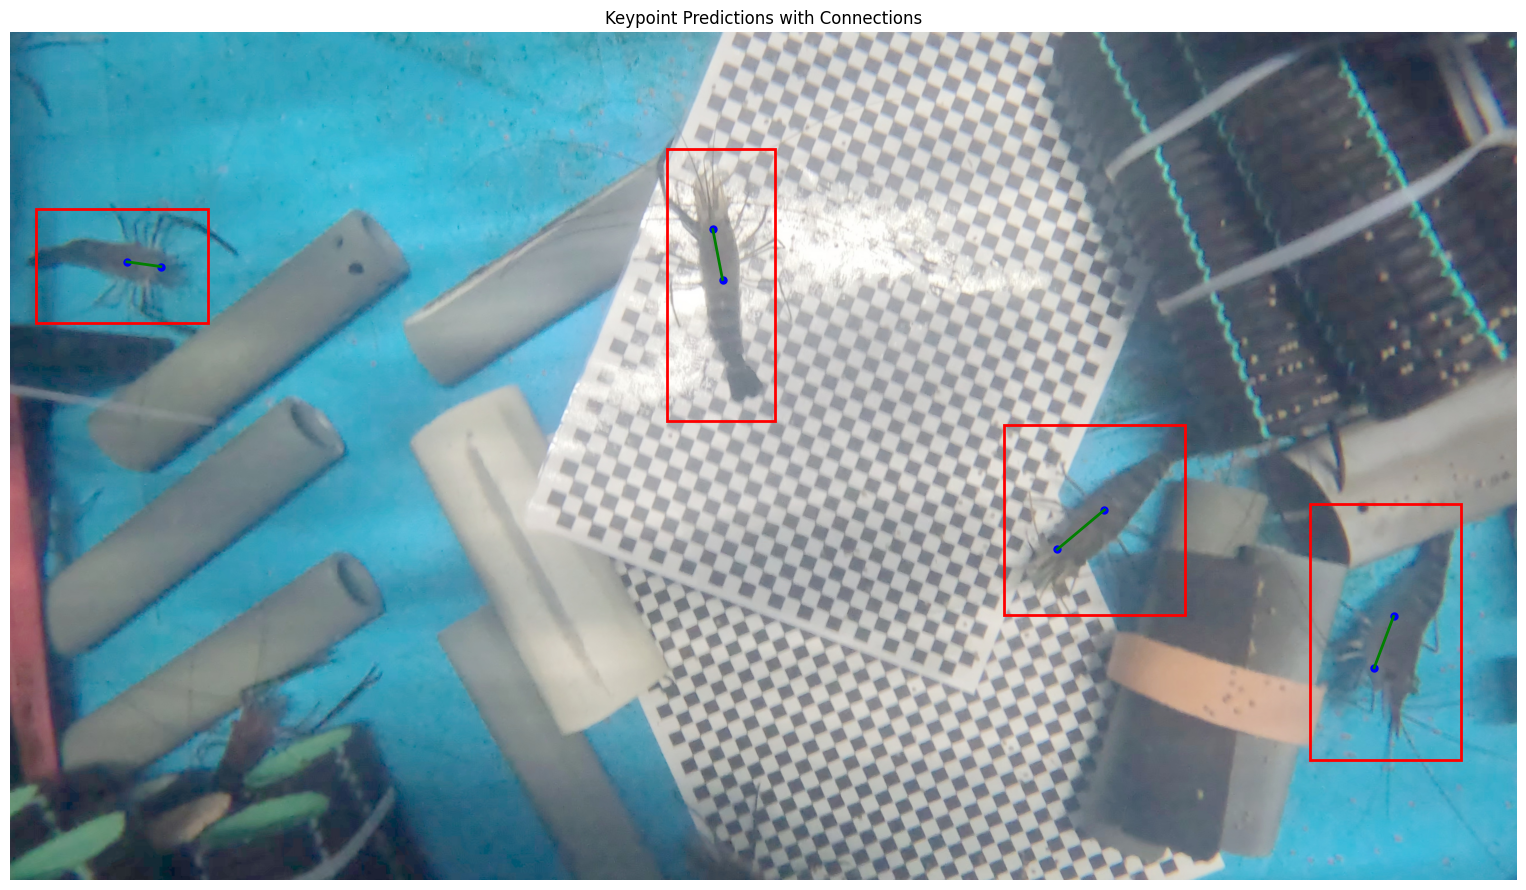

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_keypoints(image_path, predictions, conf_threshold=0.5):
    # Load the image
    try:
        image = Image.open(image_path)
        print(f"Image loaded: {image_path}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    plt.figure(figsize=(16, 9))  # Adjusted for 5312x2988 aspect ratio
    plt.imshow(image)
    
    for pred in predictions:
        class_id, x, y, w, h, *keypoints = pred
        
        # Draw bounding box
        rect = plt.Rectangle((x * image.width - w * image.width / 2, y * image.height - h * image.height / 2), 
                             w * image.width, h * image.height, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Draw keypoints and connect them
        if len(keypoints) >= 6:
            kp1_x, kp1_y, kp1_conf = keypoints[0:3]
            kp2_x, kp2_y, kp2_conf = keypoints[3:6]
            
            if kp1_conf > conf_threshold and kp2_conf > conf_threshold:
                plt.plot(kp1_x * image.width, kp1_y * image.height, 'o', color='blue', markersize=5)
                plt.plot(kp2_x * image.width, kp2_y * image.height, 'o', color='blue', markersize=5)
                
                # Draw line between keypoints
                plt.plot([kp1_x * image.width, kp2_x * image.width],
                         [kp1_y * image.height, kp2_y * image.height],
                         '-', color='green', linewidth=2)
    
    plt.title('Keypoint Predictions with Connections')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load predictions from the text file
predictions = []
try:
    with open(r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict27\labels\GX010082_236_3137-jpg_gamma_jpg.rf.dfa0794c8be9bb506588bc0e712bd745.txt", 'r') as f:
        for line in f:
            predictions.append([float(x) for x in line.strip().split()])
    print(f"Loaded {len(predictions)} predictions.")
except Exception as e:
    print(f"Error reading predictions: {e}")

# Specify the path to the image you want to display
image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg"  # Replace with your actual image path

# Plot the keypoints on the image
plot_keypoints(image_path, predictions)

Loaded 4 predictions.
Image loaded: C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg


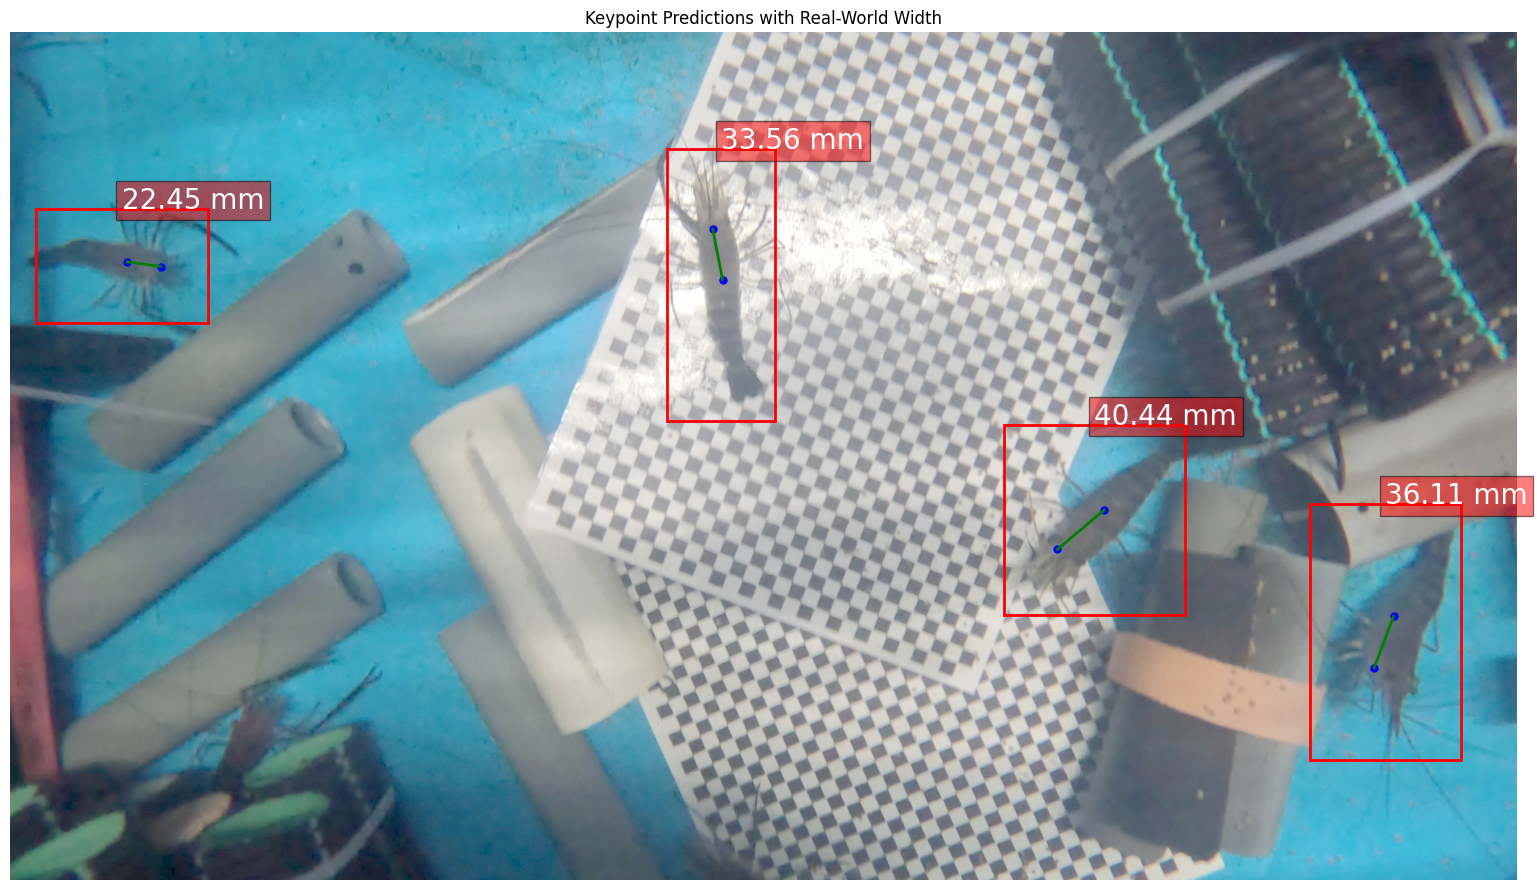

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

def calculate_real_width(focal_length, distance_to_object, width_in_pixels, pixel_size):
    width_in_sensor = width_in_pixels * pixel_size
    real_width_mm = (width_in_sensor * distance_to_object) / focal_length
    return real_width_mm

def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def plot_keypoints(image_path, predictions, conf_threshold=0.5):
    try:
        image = Image.open(image_path)
        print(f"Image loaded: {image_path}")
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    plt.figure(figsize=(16, 9))
    plt.imshow(image)
    
    # Camera parameters (you may need to adjust these)
    focal_length = 24.22  # mm
    distance_to_object = 630  # mm (5 meters)
    pixel_size = 0.00716844  # mm (assuming a typical pixel size for a 5312x2988 sensor)
    
    for pred in predictions:
        class_id, x, y, w, h, *keypoints = pred
        
        # Draw bounding box
        rect = plt.Rectangle((x * image.width - w * image.width / 2, y * image.height - h * image.height / 2), 
                             w * image.width, h * image.height, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        
        # Draw keypoints and connect them
        if len(keypoints) >= 6:
            kp1_x, kp1_y, kp1_conf = keypoints[0:3]
            kp2_x, kp2_y, kp2_conf = keypoints[3:6]
            
            if kp1_conf > conf_threshold and kp2_conf > conf_threshold:
                plt.plot(kp1_x * image.width, kp1_y * image.height, 'o', color='blue', markersize=5)
                plt.plot(kp2_x * image.width, kp2_y * image.height, 'o', color='blue', markersize=5)
                
                # Draw line between keypoints
                plt.plot([kp1_x * image.width, kp2_x * image.width],
                         [kp1_y * image.height, kp2_y * image.height],
                         '-', color='green', linewidth=2)
                
                # Calculate Euclidean distance between keypoints in pixels
                distance_pixels = euclidean_distance(kp1_x * image.width, kp1_y * image.height,
                                                     kp2_x * image.width, kp2_y * image.height)
                
                # Calculate real-world width
                real_width = calculate_real_width(focal_length, distance_to_object, distance_pixels, pixel_size)
                
                # Display real-world width next to the object
                plt.text(x * image.width, (y - h/2) * image.height, 
                         f'{real_width:.2f} mm', color='white', fontsize=20, 
                         bbox=dict(facecolor='red', alpha=0.5))
    
    plt.title('Keypoint Predictions with Real-World Width')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load predictions from the text file
predictions = []
try:
    with open(r"C:\Users\gbo10\Videos\data-science\Research-counting-algorithms\runs\pose\predict27\labels\GX010082_236_3137-jpg_gamma_jpg.rf.dfa0794c8be9bb506588bc0e712bd745.txt", 'r') as f:
        for line in f:
            predictions.append([float(x) for x in line.strip().split()])
    print(f"Loaded {len(predictions)} predictions.")
except Exception as e:
    print(f"Error reading predictions: {e}")

# Specify the path to the image you want to display
image_path = r"C:\Users\gbo10\OneDrive\measurement_paper_images\images used for imageJ\check\stabilized\shai\measurements/1\carapace\right\undistorted_GX010082_236_3137.jpg_gamma.jpg"  # Replace with your actual image path

# Plot the keypoints on the image
plot_keypoints(image_path, predictions)

In [ ]:
import numpy as np
from typing import List, Tuple, Dict
from collections import OrderedDict

def parse_yolo_label_file(filepath: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Parses a YOLO label format file to extract keypoints, visibility masks, and bounding box sizes.

    Args:
        filepath (str): Path to the YOLO label format file.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray]:
            - keypoints (np.ndarray): Array of keypoints with shape (N, K, 2) where N is the number of instances,
              and K is the number of keypoints per instance.
            - visibility_mask (np.ndarray): Boolean array indicating the visibility of keypoints with shape (N, K).
            - bbox_sizes (np.ndarray): Array of bounding box sizes with shape (N, 2) where N is the number of instances.
    """
    with open(filepath, 'r') as file:
        lines = file.readlines()

    keypoints, visibility_mask, bbox_sizes = [], [], []

    for line in lines:
        elements = list(map(float, line.strip().split()))
        keypoints.append(np.array(elements[1:7]).reshape(-1, 2))  # Extract keypoint coordinates
        visibility_mask.append(np.ones((3,), dtype=bool))  # Assuming all keypoints are visible
        bbox_sizes.append(np.array(elements[7:9]))  # Extract bbox size

    return np.array(keypoints), np.array(visibility_mask), np.array(bbox_sizes)

def parse_yolo_prediction_file(filepath: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Parses a YOLO prediction format file to extract predicted keypoints and confidence scores.

    Args:
        filepath (str): Path to the YOLO prediction format file.

    Returns:
        Tuple[np.ndarray, np.ndarray]:
            - keypoints (np.ndarray): Array of predicted keypoints with shape (N, K, 2) where N is the number of instances,
              and K is the number of keypoints per instance.
            - confidence_scores (np.ndarray): Array of confidence scores for each keypoint with shape (N, K).
    """
    with open(filepath, 'r') as file:
        lines = file.readlines()

    keypoints, confidence_scores = [], []

    for line in lines:
        elements = list(map(float, line.strip().split()))
        keypoints.append(np.array(elements[1:7]).reshape(-1, 2))  # Extract keypoint coordinates
        confidence_scores.append(np.array(elements[7:10]))  # Extract confidence scores for keypoints

    return np.array(keypoints), np.array(confidence_scores)

def calc_distances(pred: np.ndarray, gt: np.ndarray, mask: np.ndarray, norm_factor: np.ndarray) -> np.ndarray:
    """
    Calculates the normalized distances between predicted and ground truth keypoints.

    Args:
        pred (np.ndarray): Predicted keypoints with shape (N, K, 2).
        gt (np.ndarray): Ground truth keypoints with shape (N, K, 2).
        mask (np.ndarray): Visibility mask with shape (N, K) where True indicates the keypoint is visible.
        norm_factor (np.ndarray): Normalization factor (e.g., bounding box size) with shape (N, 2).

    Returns:
        np.ndarray: Normalized distances between predicted and ground truth keypoints.
    """
    distances = np.sqrt(((pred - gt) ** 2).sum(axis=2)) / norm_factor[:, np.newaxis]
    return distances

def distance_acc(distance: np.ndarray, thr: float) -> float:
    """
    Calculates the accuracy based on the distance threshold.

    Args:
        distance (np.ndarray): Array of distances between predicted and ground truth keypoints.
        thr (float): Threshold for determining if a keypoint is correctly predicted.

    Returns:
        float: Accuracy for the given keypoint.
    """
    return (distance < thr).mean()

def keypoint_pck_accuracy(pred: np.ndarray, gt: np.ndarray, mask: np.ndarray,
                          thr: float, norm_factor: np.ndarray) -> Tuple[np.ndarray, float, int]:
    """
    Calculates the pose accuracy using the Percentage of Correct Keypoints (PCK) metric.

    Args:
        pred (np.ndarray): Predicted keypoint locations with shape (N, K, 2).
        gt (np.ndarray): Ground truth keypoint locations with shape (N, K, 2).
        mask (np.ndarray): Visibility mask with shape (N, K).
        thr (float): Threshold for the PCK calculation.
        norm_factor (np.ndarray): Normalization factor for each instance with shape (N, 2).

    Returns:
        Tuple[np.ndarray, float, int]:
            - acc (np.ndarray): Accuracy of each keypoint.
            - avg_acc (float): Averaged accuracy across all keypoints.
            - cnt (int): Number of valid keypoints.
    """
    distances = calc_distances(pred, gt, mask, norm_factor)
    acc = np.array([distance_acc(d, thr) for d in distances])
    valid_acc = acc[acc >= 0]
    cnt = len(valid_acc)
    avg_acc = valid_acc.mean() if cnt > 0 else 0
    return acc, avg_acc, cnt

class PCKAccuracy:
    """
    PCK (Percentage of Correct Keypoints) accuracy evaluation metric for pose estimation.

    This class calculates the PCK accuracy for each keypoint and the average accuracy across all keypoints.

    Args:
        thr (float): Threshold for the PCK calculation. Defaults to 0.2.
        norm_item (str): The item used for normalization. Defaults to 'bbox'.
    """
    def __init__(self, thr: float = 0.2, norm_item: str = 'bbox') -> None:
        self.thr = thr
        self.norm_item = norm_item

    def __call__(self, preds: List[Dict], gts: List[Dict]) -> OrderedDict:
        """
        Calculate the PCK accuracy for a list of predictions and ground truth annotations.

        Args:
            preds (List[Dict]): List of predictions, each containing keypoint coordinates.
            gts (List[Dict]): List of ground truth annotations, each containing keypoint coordinates,
                               visibility mask, and bounding box sizes.

        Returns:
            OrderedDict: A dictionary containing the PCK accuracy result.
        """
        all_acc, all_avg_acc, all_cnt = [], [], 0
        for pred, gt in zip(preds, gts):
            acc, avg_acc, cnt = keypoint_pck_accuracy(
                pred['coords'], gt['coords'], gt['mask'], self.thr, gt['bbox_size'])
            all_acc.append(acc)
            all_avg_acc.append(avg_acc)
            all_cnt += cnt
        
        return OrderedDict([(f'PCK@{self.thr}', np.mean(all_avg_acc))])

# Example usage
label_filepath = 'path/to/label_file.txt'
prediction_filepath = 'path/to/prediction_file.txt'

# Parse label and prediction files
gt_keypoints, gt_mask, gt_bbox = parse_yolo_label_file(label_filepath)
pred_keypoints, pred_confidences = parse_yolo_prediction_file(prediction_filepath)

# Assume bbox sizes are consistent between predictions and ground truth
norm_factor = gt_bbox

# Calculate accuracy using the PCK metric
acc, avg_acc, cnt = keypoint_pck_accuracy(pred_keypoints, gt_keypoints, gt_mask, thr=0.2, norm_factor=norm_factor)

print(f"Per-Keypoint Accuracy: {acc}")
print(f"Averaged Accuracy: {avg_acc}")
print(f"Valid Keypoints Count: {cnt}")

# Using the PCKAccuracy class
pck_metric = PCKAccuracy(thr=0.2, norm_item='bbox')
result = pck_metric(
    [{'coords': pred_keypoints}], 
    [{'coords': gt_keypoints, 'mask': gt_mask, 'bbox_size': norm_factor}]
)

print(f"Final PCK Result: {result}")
